---
author: "Robert Ritz"
draft: true
echo: false
---

# Exploratory Data Analysis of Song Data

Song data comes from the top singles list for each year from 1958 to 2022. 

Data features are gathered from the Spotify API (here)[https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-features].

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)

import math

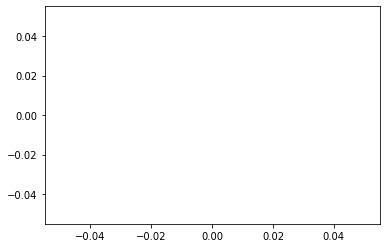

In [ ]:
plt.plot();

In [ ]:
plt.style.use("datafantic-right.mplstyle")

In [ ]:
df = pd.read_csv("songs.csv")

In [ ]:
df

,entry_date,title,artist,peak,peak_date,weeks_top_ten,year,spotify_uri,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,August 4,"""Poor Little Fool""",Ricky Nelson,1,August 4,6,1958,spotify:track:5ayybTSXNwcarDtxQKqvWX,0.474,0.338,...,0.1300,0.8100,154.596,audio_features,5ayybTSXNwcarDtxQKqvWX,spotify:track:5ayybTSXNwcarDtxQKqvWX,https://api.spotify.com/v1/tracks/5ayybTSXNwca...,https://api.spotify.com/v1/audio-analysis/5ayy...,153933.0,4.0
1,August 4,"""Patricia""",Pérez Prado,2,August 4,6,1958,spotify:track:2bwhOdCOLgQ8v6xStAqnju,0.699,0.715,...,0.0704,0.8100,137.373,audio_features,2bwhOdCOLgQ8v6xStAqnju,spotify:track:2bwhOdCOLgQ8v6xStAqnju,https://api.spotify.com/v1/tracks/2bwhOdCOLgQ8...,https://api.spotify.com/v1/audio-analysis/2bwh...,140000.0,4.0
2,August 4,"""Splish Splash""",Bobby Darin,3,August 4,3,1958,spotify:track:40fD7ct05FvQHLdQTgJelG,0.645,0.943,...,0.3700,0.9650,147.768,audio_features,40fD7ct05FvQHLdQTgJelG,spotify:track:40fD7ct05FvQHLdQTgJelG,https://api.spotify.com/v1/tracks/40fD7ct05FvQ...,https://api.spotify.com/v1/audio-analysis/40fD...,131720.0,4.0
3,August 4,"""Hard Headed Woman""",Elvis Presley,4,August 4,2,1958,spotify:track:3SU1TXJtAsf8jCKdUeYy53,0.616,0.877,...,0.1840,0.9190,97.757,audio_features,3SU1TXJtAsf8jCKdUeYy53,spotify:track:3SU1TXJtAsf8jCKdUeYy53,https://api.spotify.com/v1/tracks/3SU1TXJtAsf8...,https://api.spotify.com/v1/audio-analysis/3SU1...,114240.0,4.0
4,August 4,"""When""",Kalin Twins,5,August 4,5,1958,spotify:track:3HZJ9BLBpDya4p71VfXSWp,0.666,0.468,...,0.1190,0.9460,93.018,audio_features,3HZJ9BLBpDya4p71VfXSWp,spotify:track:3HZJ9BLBpDya4p71VfXSWp,https://api.spotify.com/v1/tracks/3HZJ9BLBpDya...,https://api.spotify.com/v1/audio-analysis/3HZJ...,146573.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4246,June 4,"""Matilda""",Harry Styles,9,June 4,1,2022,spotify:track:6uvh0In7u1Xn4HgxOfAn8O,0.507,0.294,...,0.0966,0.3860,114.199,audio_features,6uvh0In7u1Xn4HgxOfAn8O,spotify:track:6uvh0In7u1Xn4HgxOfAn8O,https://api.spotify.com/v1/tracks/6uvh0In7u1Xn...,https://api.spotify.com/v1/audio-analysis/6uvh...,245964.0,4.0
4247,June 11,"""Running Up That Hill A Deal with God""",Kate Bush,4,June 18,4*,2022,spotify:track:29d0nY7TzCoi22XBqDQkiP,0.625,0.533,...,0.0546,0.1390,108.296,audio_features,29d0nY7TzCoi22XBqDQkiP,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840.0,4.0
4248,June 25,"""Glimpse of Us""",Joji,8,July 2,2*,2022,spotify:track:6xGruZOHLs39ZbVccQTuPZ,0.440,0.317,...,0.1410,0.2680,169.914,audio_features,6xGruZOHLs39ZbVccQTuPZ,spotify:track:6xGruZOHLs39ZbVccQTuPZ,https://api.spotify.com/v1/tracks/6xGruZOHLs39...,https://api.spotify.com/v1/audio-analysis/6xGr...,233456.0,3.0
4249,July 2,"""Sticky""",Drake,6,July 2,1*,2022,spotify:track:4rmVZajAF7PkrCagGPHbqa,0.853,0.495,...,0.0844,0.0774,137.027,audio_features,4rmVZajAF7PkrCagGPHbqa,spotify:track:4rmVZajAF7PkrCagGPHbqa,https://api.spotify.com/v1/tracks/4rmVZajAF7Pk...,https://api.spotify.com/v1/audio-analysis/4rmV...,243228.0,4.0


In [ ]:


df_1 = _deepnote_execute_sql("""
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

In [ ]:
year = df.groupby(by='year').mean().drop(columns='peak').reset_index()

In [ ]:
year.head()

,year,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1958,0.577275,0.502250,5.625000,-10.385025,0.875000,0.059357,0.642948,0.116704,0.185743,0.708625,122.238650,149064.300000,3.825000
1,1959,0.537851,0.528930,5.103448,-10.256540,0.816092,0.059131,0.681779,0.091981,0.200289,0.683483,121.896690,150422.011494,3.804598
2,1960,0.537817,0.471824,4.827957,-10.180505,0.870968,0.041285,0.650999,0.032680,0.199411,0.679237,120.076290,155792.612903,3.784946
3,1961,0.539490,0.470644,4.590000,-10.746760,0.910000,0.049491,0.648535,0.096826,0.208194,0.679980,121.267490,151452.270000,3.760000
4,1962,0.561260,0.506891,5.538462,-9.799865,0.798077,0.056326,0.608963,0.059317,0.226709,0.693452,117.217144,156609.653846,3.826923


## Feature Plotting

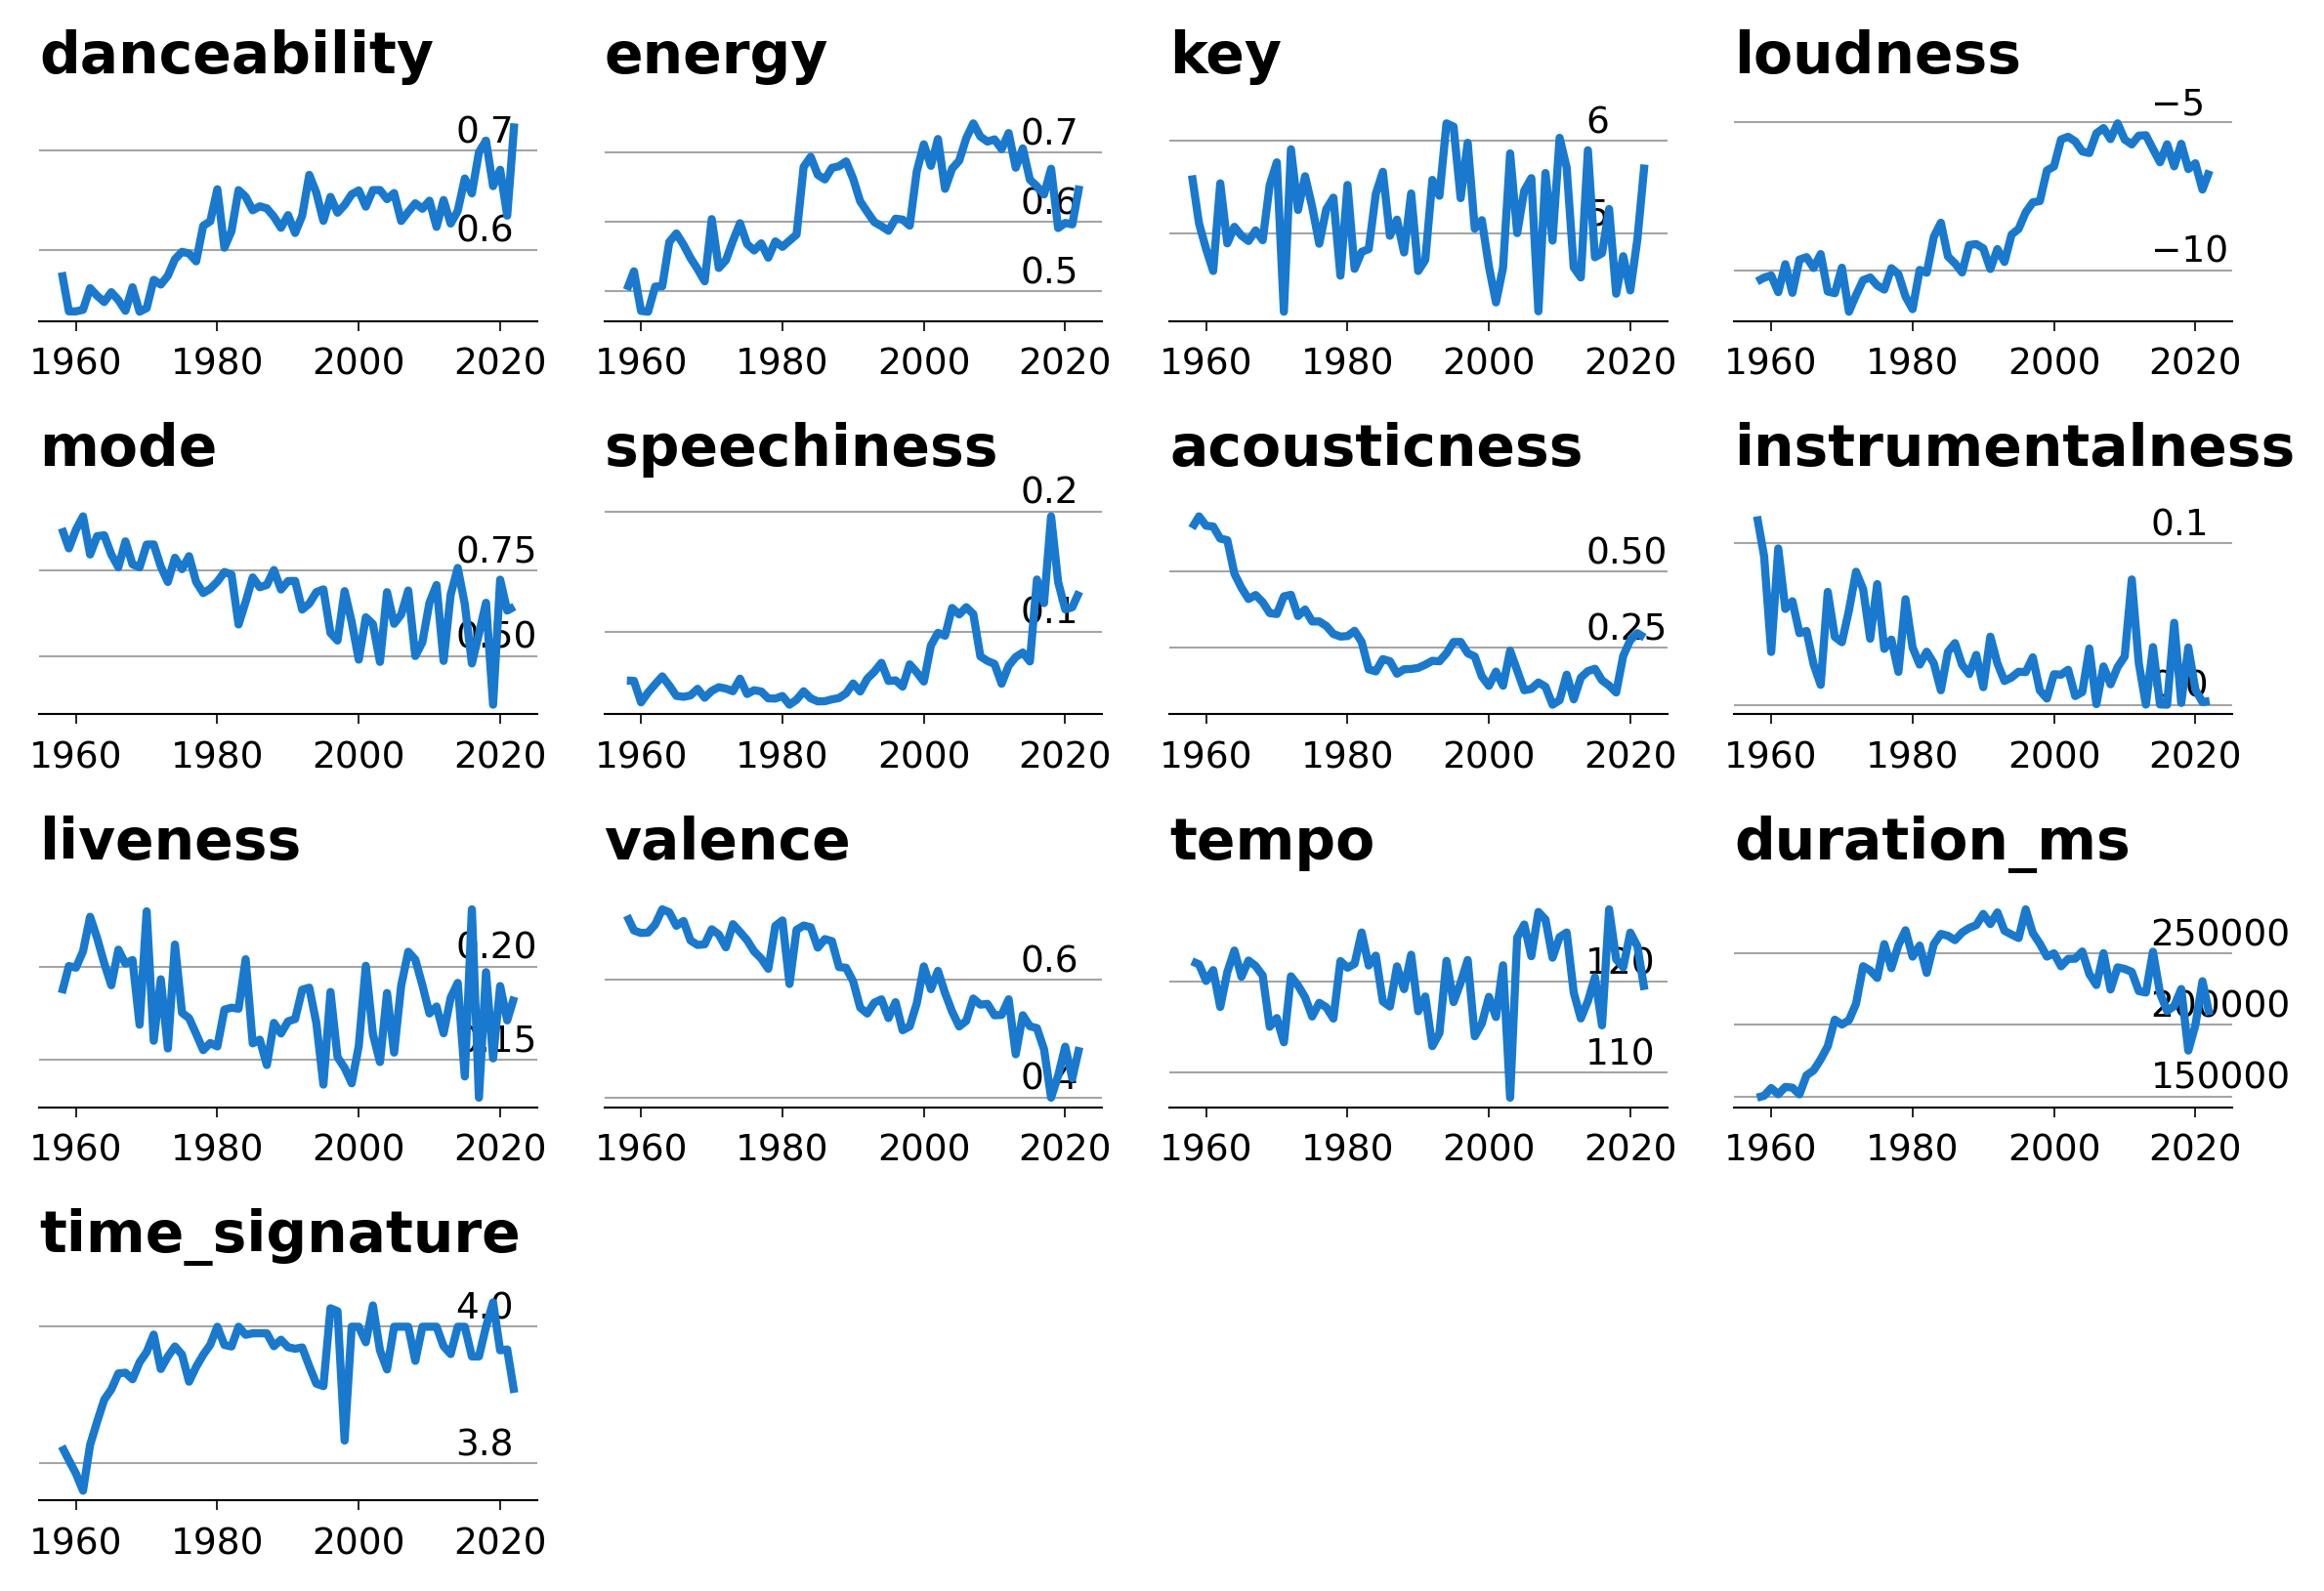

In [ ]:
N = len(year.columns[1:])
cols = 4
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure()

for n, column in zip(range(N), year.columns[1:]):
    ax = fig.add_subplot(gs[n])
    ax.plot(year['year'], year[column])
    ax.set_title(column)

fig.tight_layout()

There are some clear features that have changed over time:

- Danceability (0-1): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

- Energy (0-1): Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.

- Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. 

- Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived.

- Speechiness (0-1): Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. 

- Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- Duration: The duration of the track in milliseconds.

- Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

## Duration

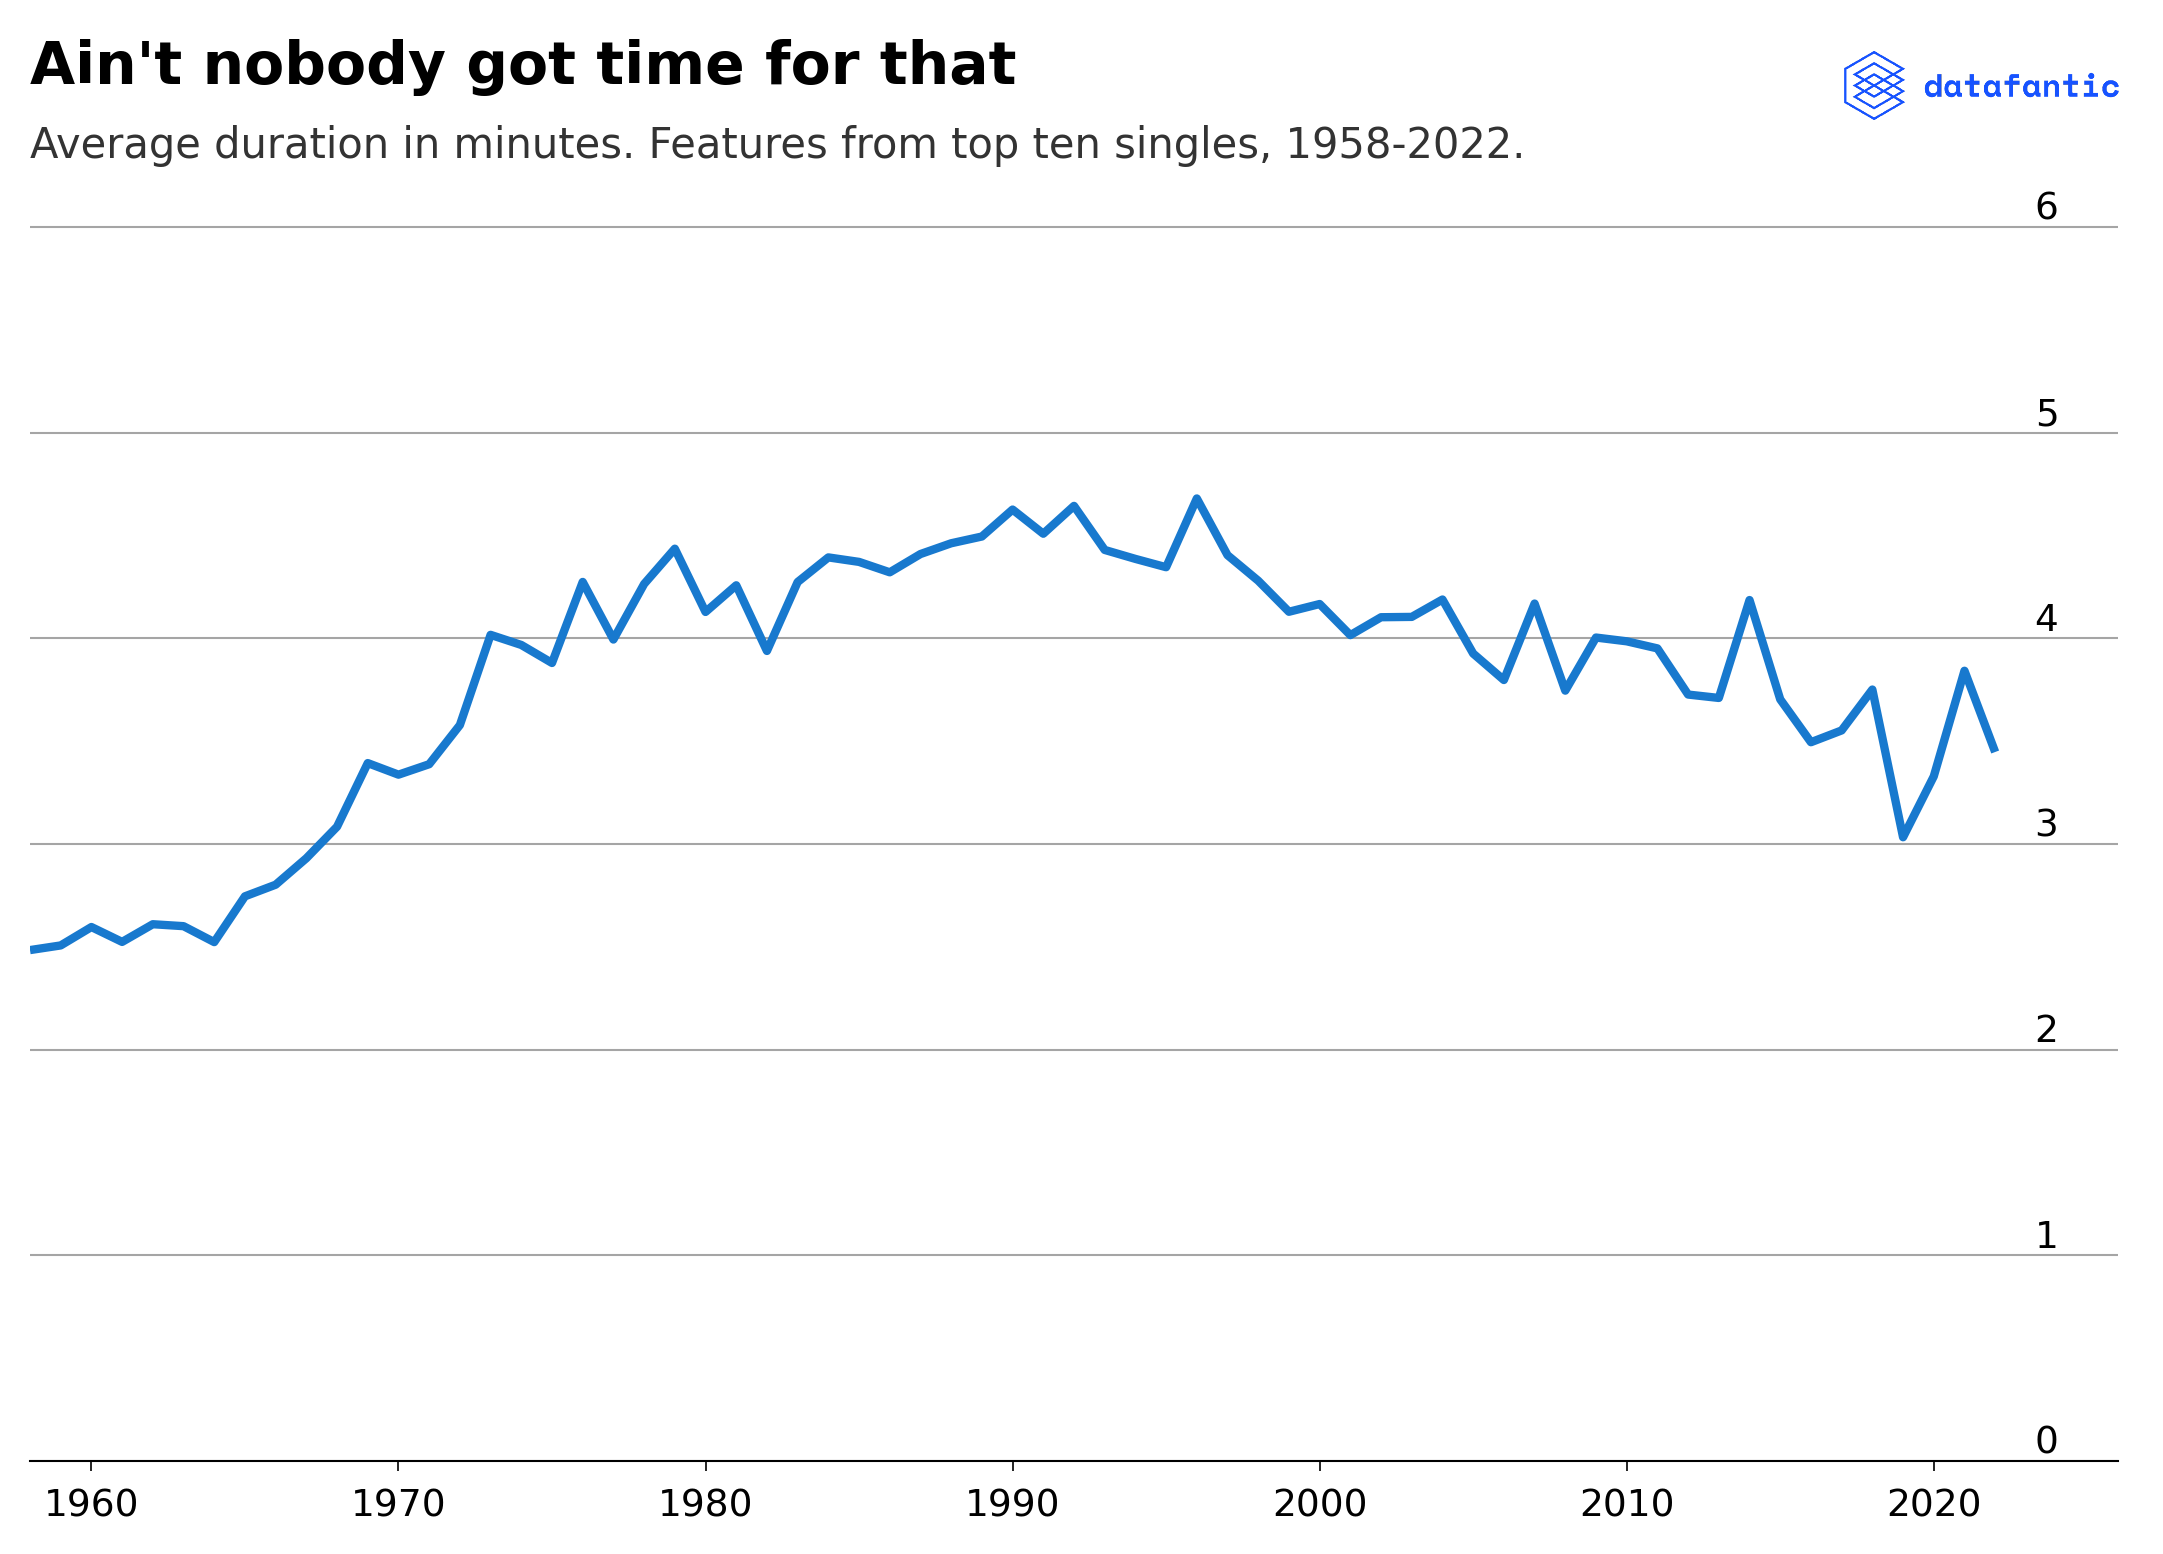

In [ ]:
fig, ax = plt.subplots()
ax.plot(year['year'], (year['duration_ms'] / 1_000) / 60)
ax.set_xlim(1958, 2026)
ax.set_ylim(0,6.5)

# Add in title and subtitle
ax.set_title("""Ain't nobody got time for that""")
ax.text(x=.08, y=.86, 
        s="Average duration in minutes. Features from top ten singles, 1958-2022.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)


# Export plot as high resolution PNG
plt.savefig('images/music_features_duration.png')

## Loudness

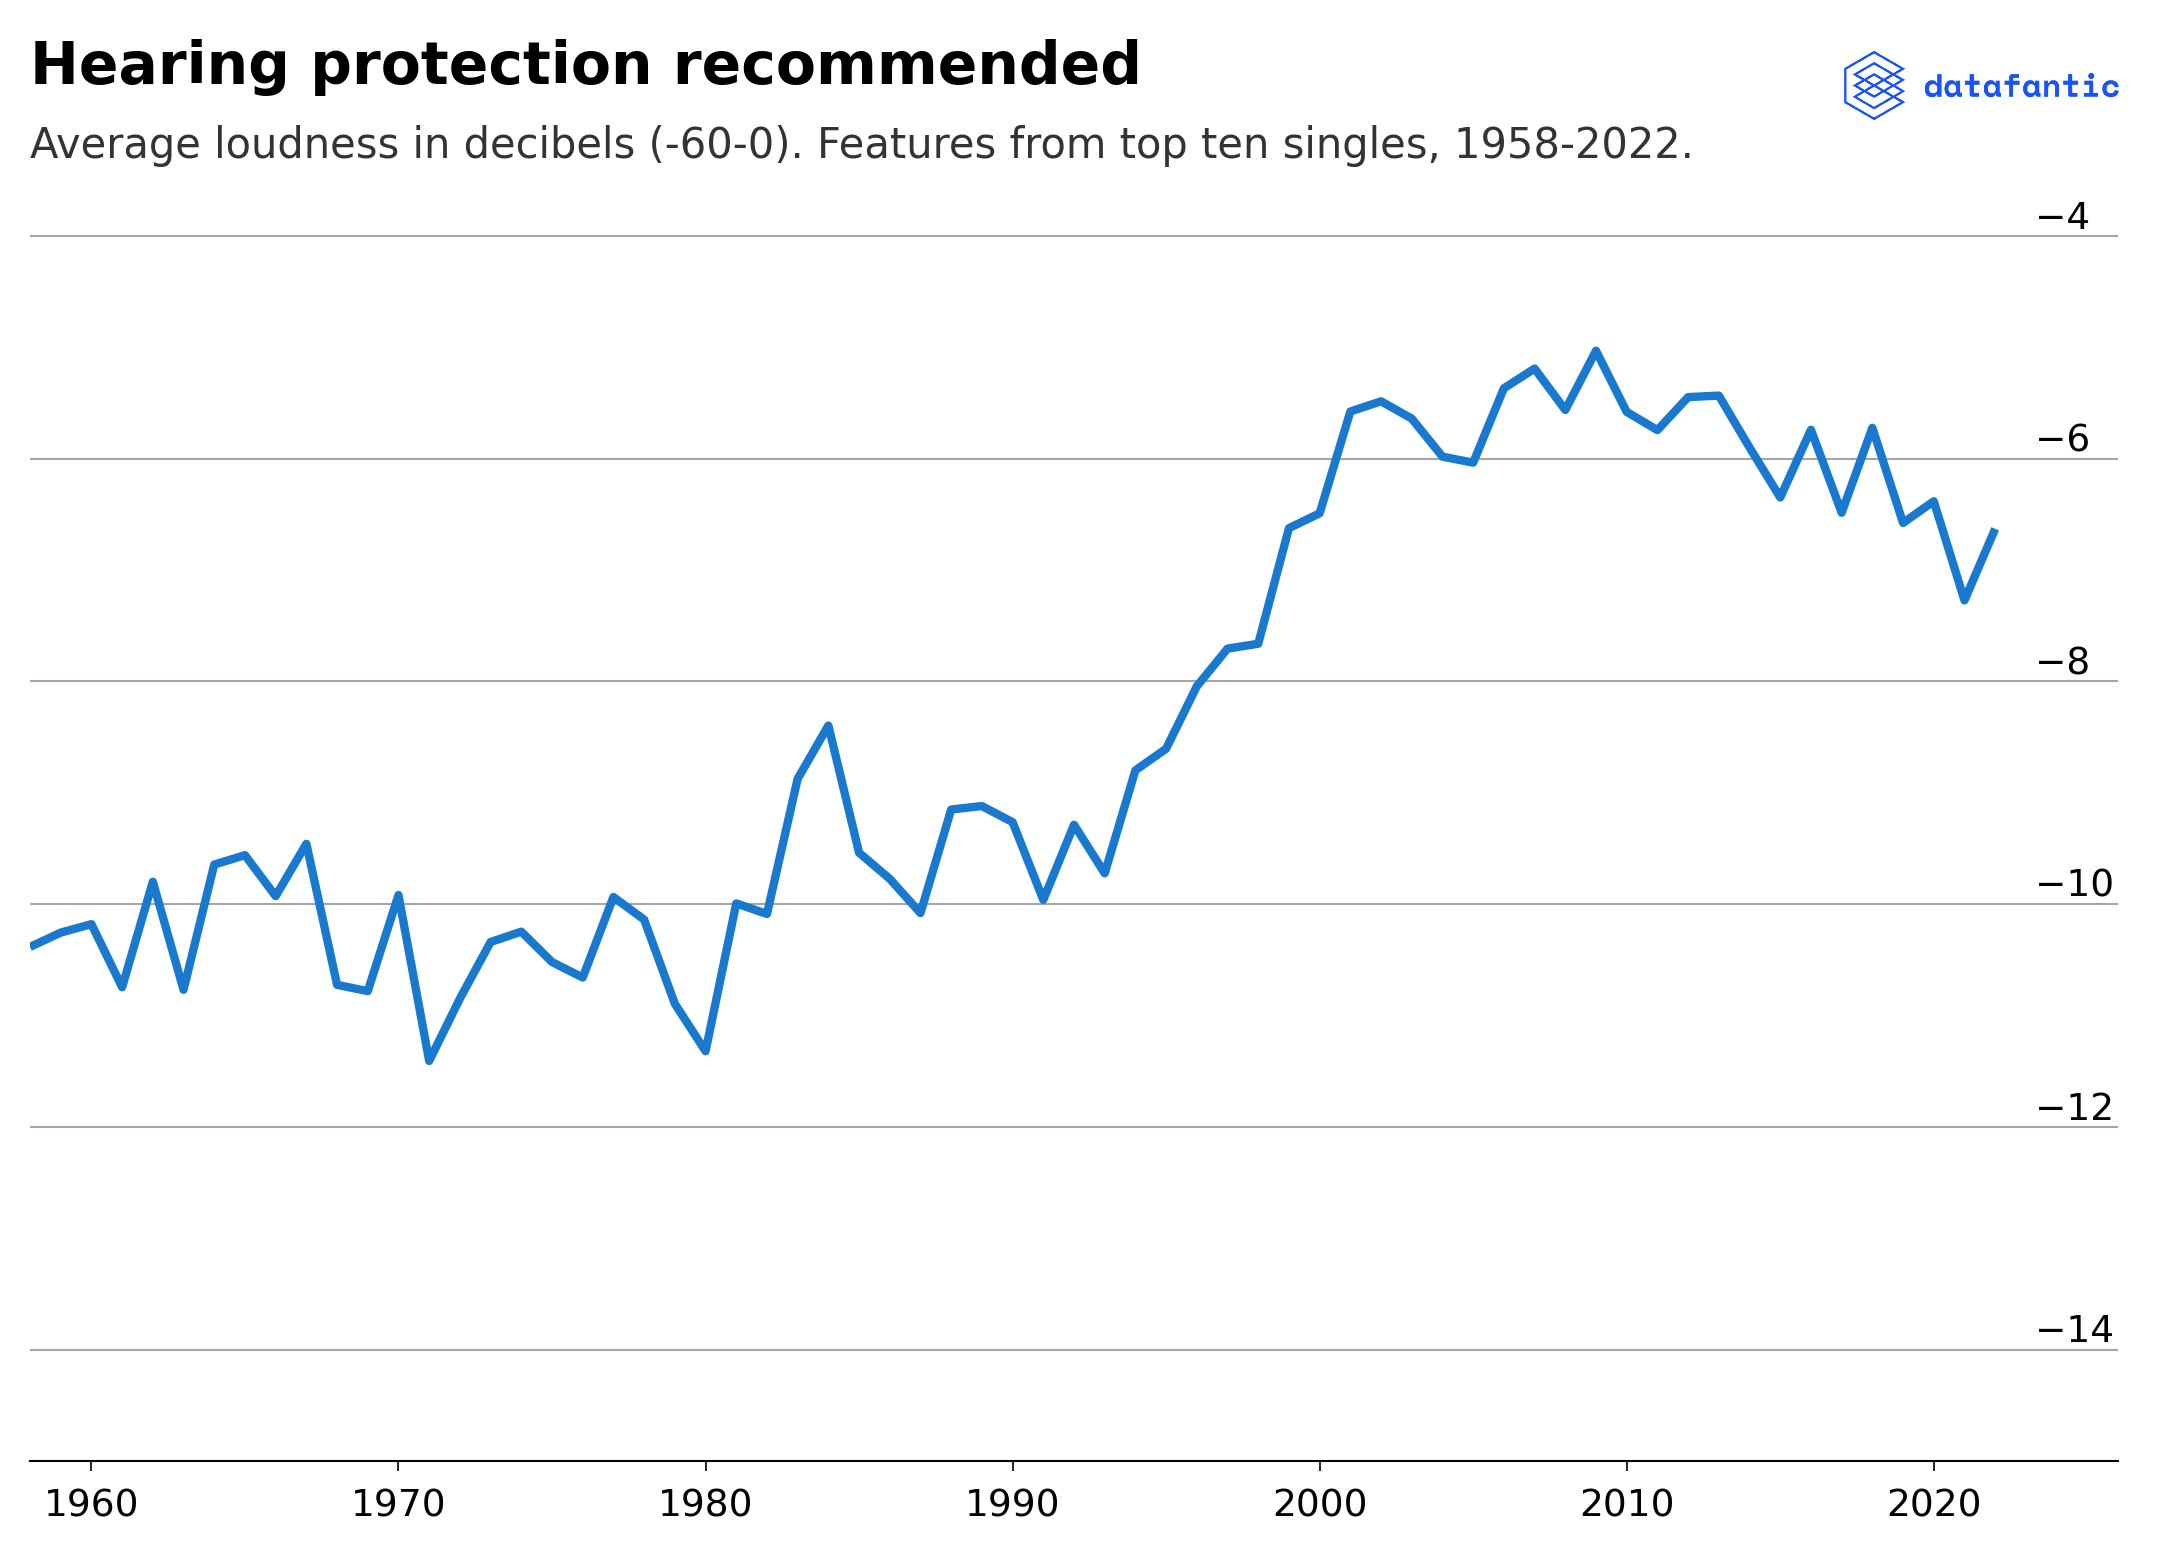

In [ ]:
fig, ax = plt.subplots()
ax.plot(year['year'], year['loudness'])
ax.set_xlim(1958, 2026)
ax.set_ylim(-15, -3)

# Add in title and subtitle
ax.set_title("""Hearing protection recommended""")
ax.text(x=.08, y=.86, 
        s="Average loudness in decibels (-60-0). Features from top ten singles, 1958-2022.", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)


# Export plot as high resolution PNG
plt.savefig('images/music_features_loudness.png')

## Features Trending Down

The features that are trending down:

- Valence

- Instrumentalness (shown separately)

- Acousticness

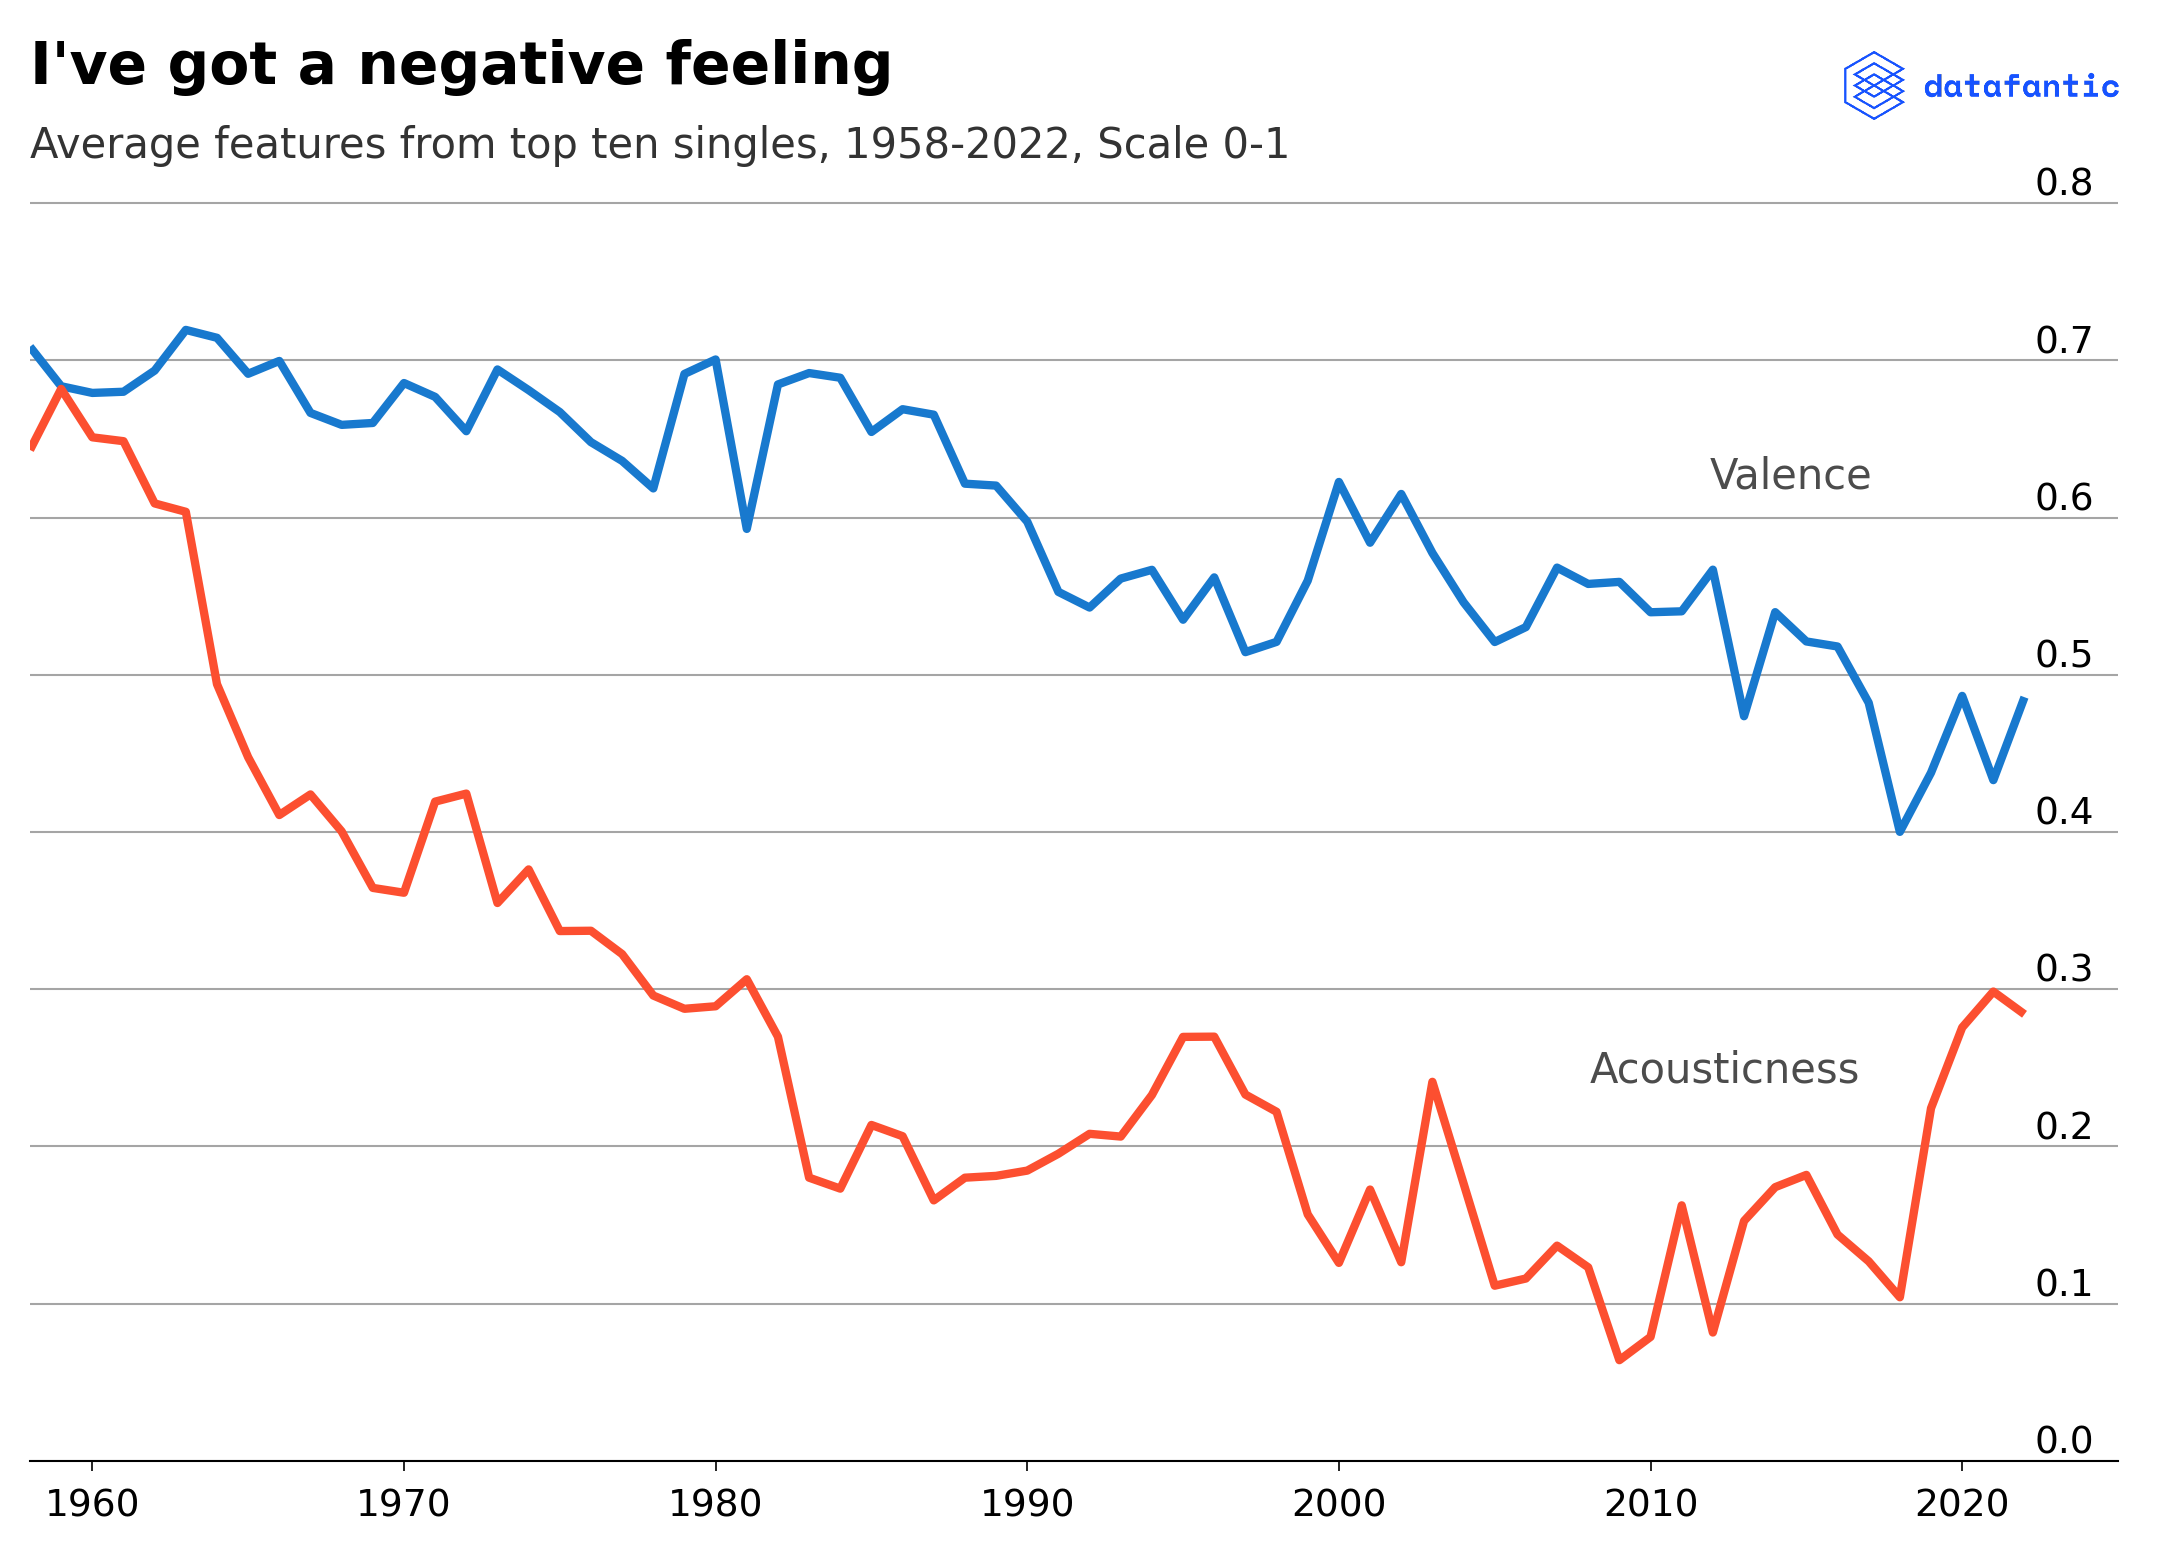

In [ ]:
fig, ax = plt.subplots()
ax.plot(year['year'], year['valence'])
ax.plot(year['year'], year['acousticness'])
ax.set_xlim(1958, 2025)
ax.set_ylim(0,.85)

# Add in title and subtitle
ax.set_title("""I've got a negative feeling""")
ax.text(x=.08, y=.86, 
        s="Average features from top ten singles, 1958-2022, Scale 0-1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Label the lines directly
ax.text(x=.78, y=.66, s="""Valence""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.73, y=.30, s="""Acousticness""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)


# Export plot as high resolution PNG
plt.savefig('images/music_features_trending_down.png')

## Features Trending Up

- Danceability

- Energy

- Speechiness (shown below)

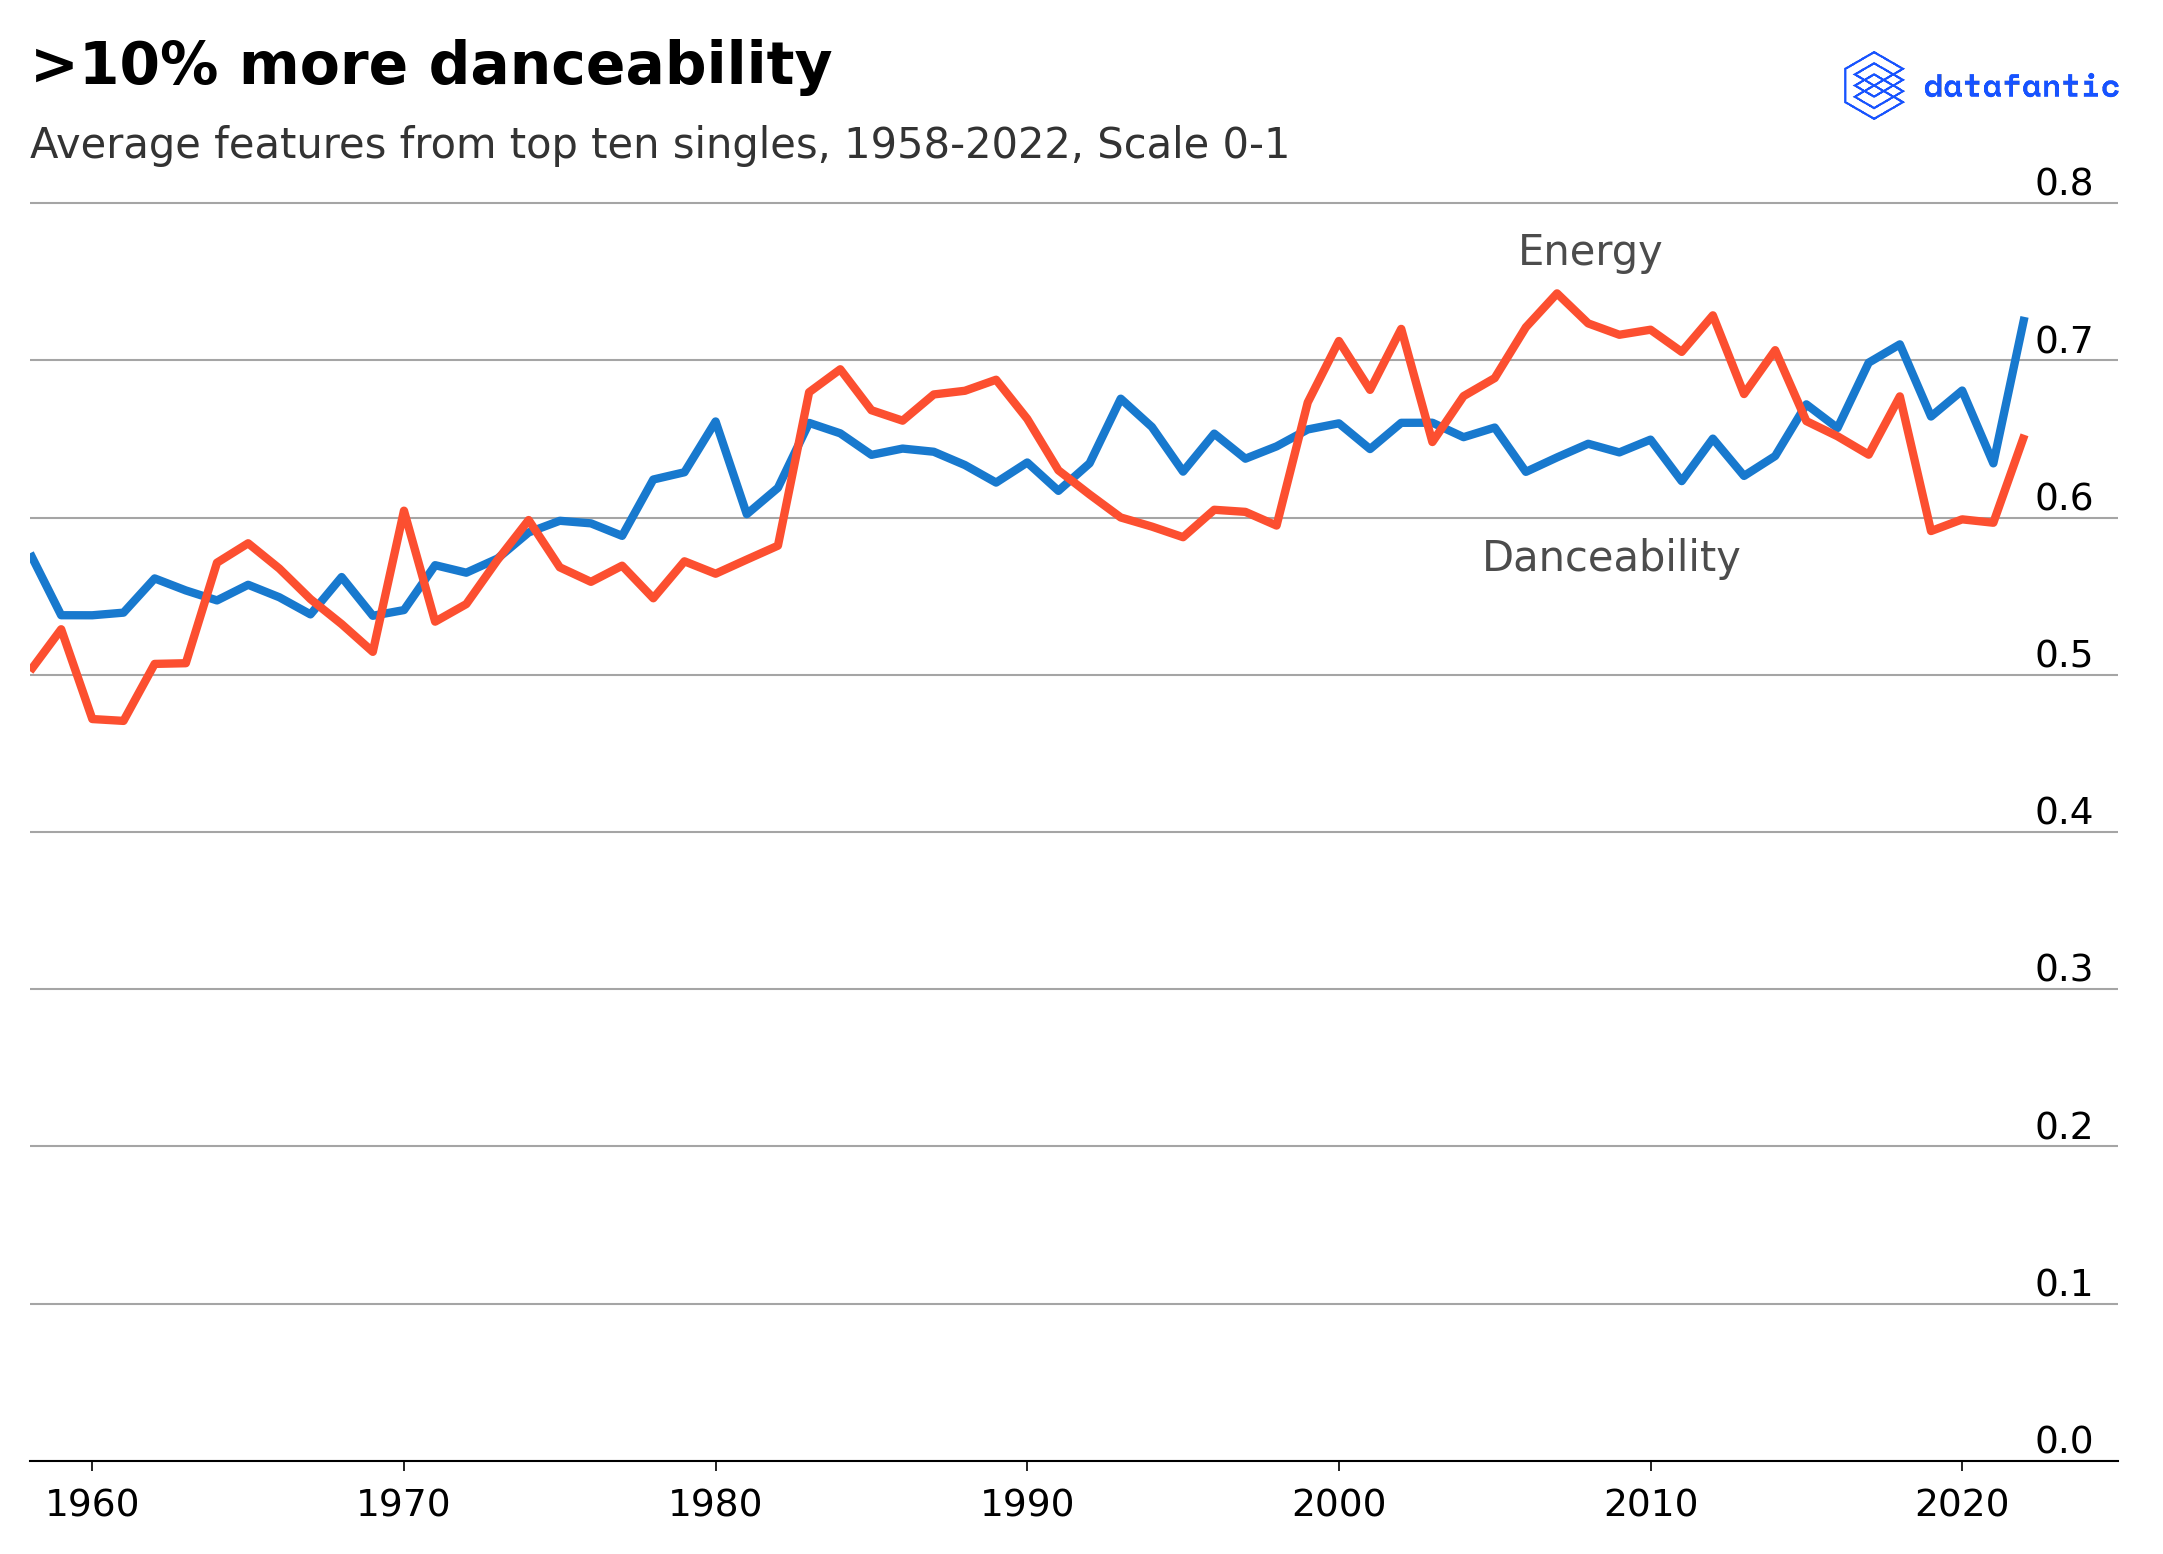

In [ ]:
fig, ax = plt.subplots()
ax.plot(year['year'], year['danceability'])
ax.plot(year['year'], year['energy'])
ax.set_xlim(1958, 2025)
ax.set_ylim(0,.85)

# Add in title and subtitle
ax.set_title('>10% more danceability')
ax.text(x=.08, y=.86, 
        s="Average features from top ten singles, 1958-2022, Scale 0-1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Label the lines directly
ax.text(x=.7, y=.795, s="""Energy""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.685, y=.61, s="""Danceability""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)


# Export plot as high resolution PNG
plt.savefig('images/music_features_trending_up.png')


## Speechiness vs Instrumentalness

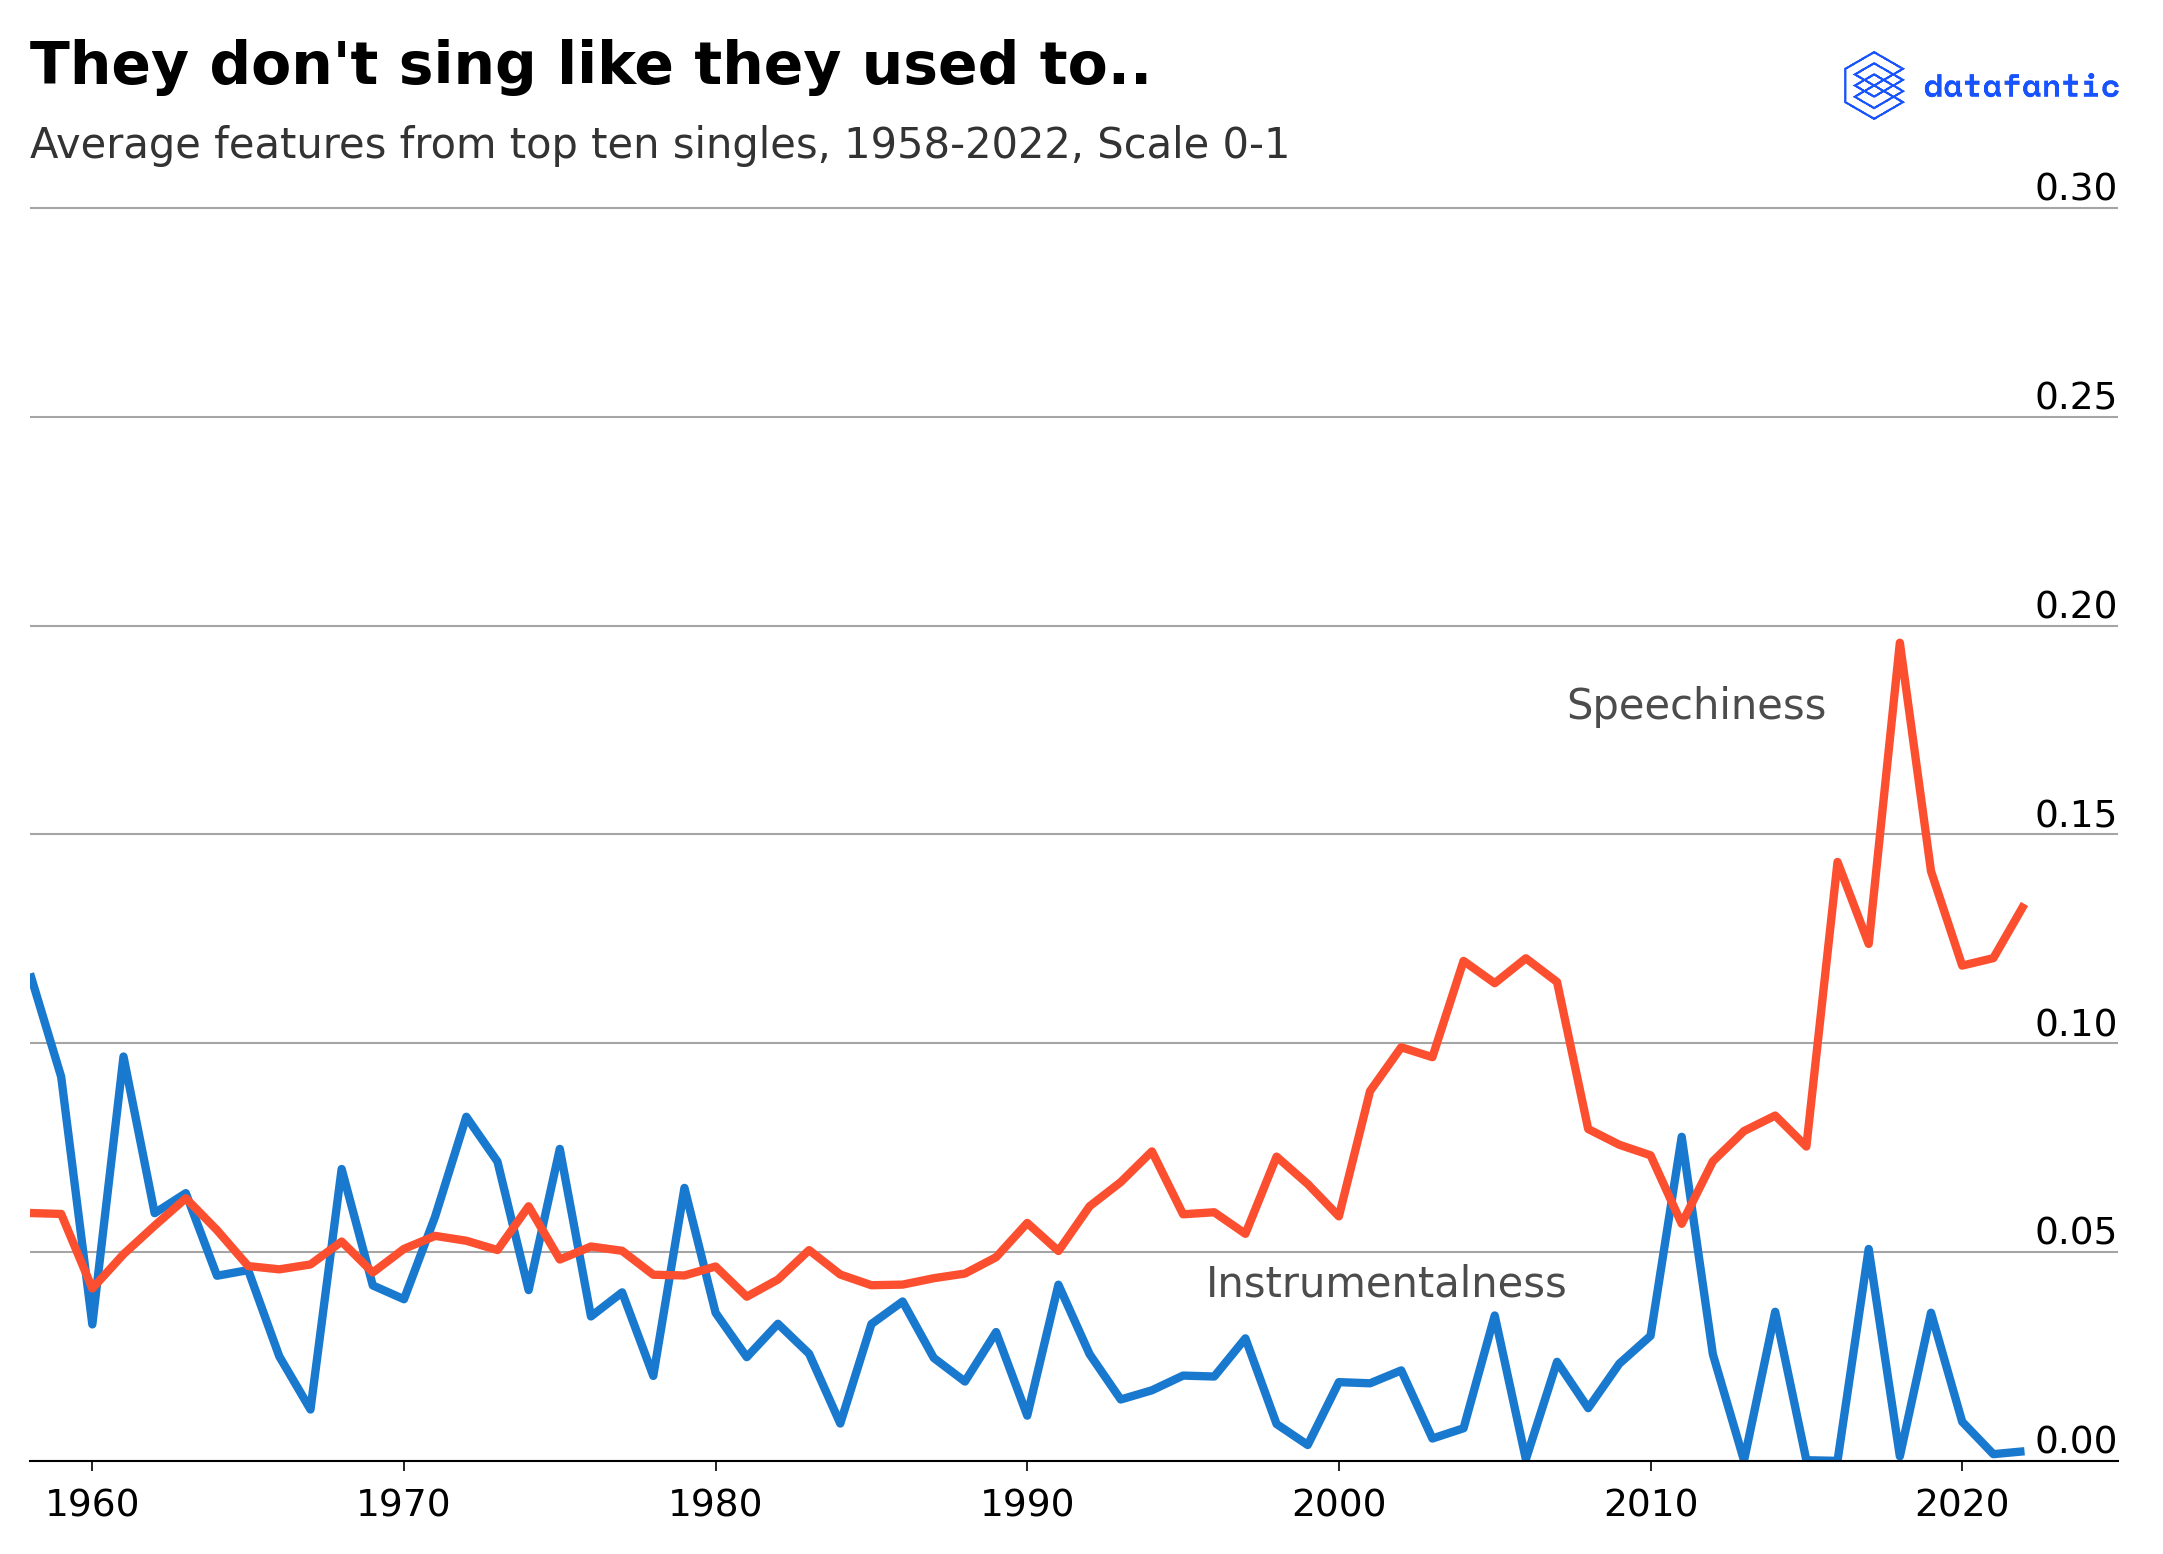

In [ ]:
fig, ax = plt.subplots()
ax.plot(year['year'], year['instrumentalness'])
ax.plot(year['year'], year['speechiness'])
ax.set_xlim(1958, 2025)
ax.set_ylim(0,.32)

ax.set_yticks(np.arange(0, .35, 0.05))

# Add in title and subtitle
ax.set_title("They don't sing like they used to..")
ax.text(x=.08, y=.86, 
        s="Average features from top ten singles, 1958-2022, Scale 0-1", 
        transform=fig.transFigure, 
        ha='left', 
        fontsize=20, 
        alpha=.8)

# Label the lines directly
ax.text(x=.57, y=.17, s="""Instrumentalness""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)
ax.text(x=.72, y=.52, s="""Speechiness""", 
        transform=fig.transFigure, ha='left', fontsize=20, alpha=.7)

# Set the logo
logo = plt.imread('images/datafantic.png')
imagebox = OffsetImage(logo, zoom=.22)
ab = AnnotationBbox(imagebox, xy=(1,1.06), xycoords='axes fraction', box_alignment=(1,1), frameon = False)
ax.add_artist(ab)


# Export plot as high resolution PNG
plt.savefig('images/music_features_instrumentalness_speechiness.png')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7c21eb15-caf5-4a09-9d2b-13b3512c0e34' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>